In [1]:
import pandas as pd
import spacy
#code for table 1 from the article 
nlp = spacy.load('en_core_web_md')

df = pd.read_csv('new_all_data.csv')
df_14_laptop_train = df.loc[df['dataset'] == '14_laptop_train']
df_14_laptop_train.reset_index(drop=True, inplace=True)

df_14_laptop_test = df.loc[df['dataset'] == '14_laptop_test']
df_14_laptop_test.reset_index(drop=True, inplace=True)

df_14_rest_train = df.loc[df['dataset'] == '14_rest_train']
df_14_rest_train.reset_index(drop=True, inplace=True)

df_14_rest_test = df.loc[df['dataset'] == '14_rest_test']
df_14_rest_test.reset_index(drop=True, inplace=True)

df_15_rest_train = df.loc[df['dataset'] == '15_rest_train']
df_15_rest_train.reset_index(drop=True, inplace=True)

df_15_rest_test = df.loc[df['dataset'] == '15_rest_test']
df_15_rest_test.reset_index(drop=True, inplace=True)

df_16_rest_train = df.loc[df['dataset'] == '16_rest_train']
df_16_rest_train.reset_index(drop=True, inplace=True)

df_16_rest_test = df.loc[df['dataset'] == '16_rest_test']
df_16_rest_test.reset_index(drop=True, inplace=True)

dataset_list = [df_14_laptop_train, df_14_laptop_test, df_14_rest_train, df_14_rest_test,
                 df_15_rest_train, df_15_rest_test, df_16_rest_train, df_16_rest_test]

sentence_count_list = []
token_count_list = []
aspect_term_count1_list = []
aspect_term_count2_list = []
aspect_term_count3_list = []
negative_count_list = []
neutral_count_list = []
positive_count_list = []

# Statistics of dataset
for dataset in dataset_list:
    # 句子数量
    sentence_count_list.append(len(dataset.drop_duplicates(subset=['sentence'], keep="first")))
    token_count = 0
    aspect_term_count1 = 0
    aspect_term_count2 = 0
    aspect_term_count3 = 0
    for i in range(len(dataset)):
        doc = nlp(dataset['sentence'][i])
        token_count += len(doc)
        
        aspect_term_count = len(dataset['aspect_term'][i].split(' '))
        if aspect_term_count == 1:
            aspect_term_count1 += 1
        elif aspect_term_count == 2:
            aspect_term_count2 += 1
        else:
            aspect_term_count3 += 1
        
    token_count_list.append(token_count)
    aspect_term_count1_list.append(aspect_term_count1)
    aspect_term_count2_list.append(aspect_term_count2)
    aspect_term_count3_list.append(aspect_term_count3)
    polarity_count = dataset.groupby('polarity')['aspect_term'].count().tolist()
    negative_count_list.append(polarity_count[0])
    neutral_count_list.append(polarity_count[1])
    positive_count_list.append(polarity_count[2])

result_df = pd.DataFrame({'句子数量': sentence_count_list, 'token数量': token_count_list, '方面词=1': aspect_term_count1_list,
                         '方面词=2': aspect_term_count2_list, '方面词>=3': aspect_term_count3_list, 'negative数量': negative_count_list,
                         'neutral数量': neutral_count_list, 'positive数量': positive_count_list}, index=[dataset['dataset'][0] for dataset in dataset_list])
result_df
# result_df.to_csv('all_data_statistics.csv')

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

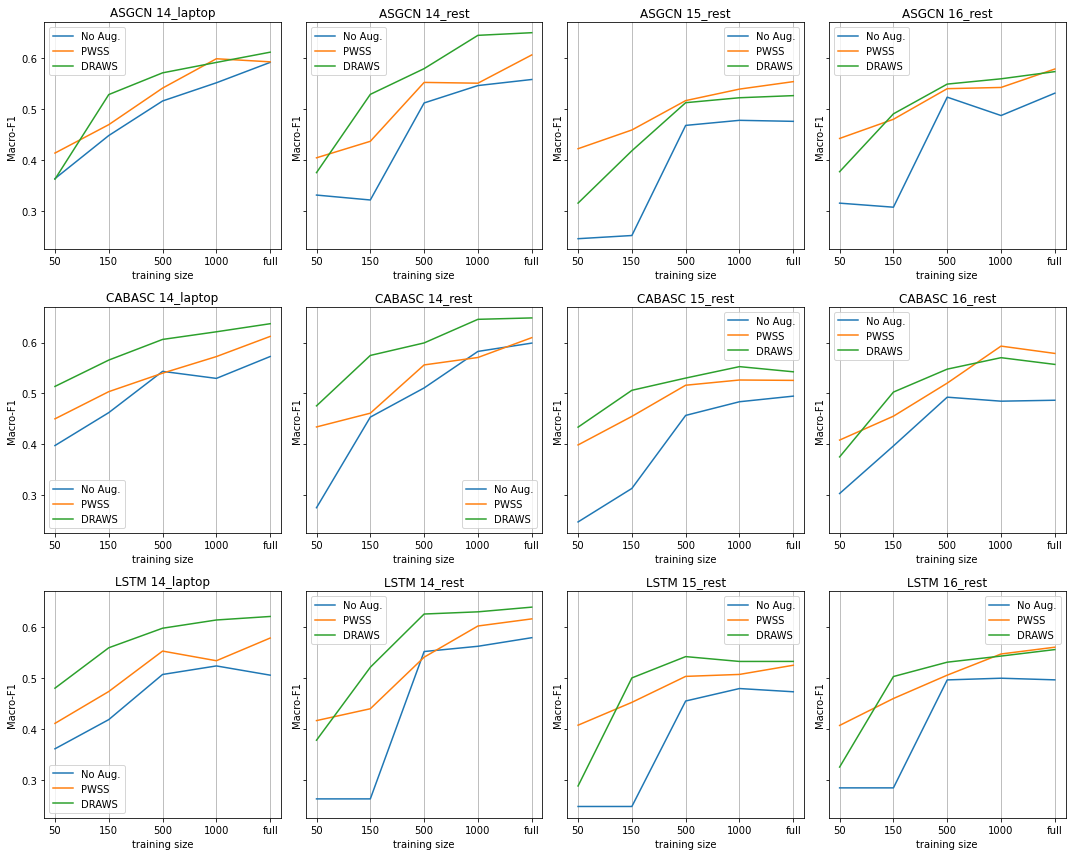

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import qgrid
import pandas as pd
import random
import ipywidgets as widgets

#code for Fig. 3 from the article 

def op2alias(x):
    if x=='op0':
        return 'No Aug.'
    if x=='op1':
        return 'PWSS'
    if x=='op2':
        return 'DRAWS'

df=pd.read_csv('result.csv') 

df=df[(df.metric=='test_f1')&(df.method!='op3')][['dataset','model_name','method','run_num','50','150','500','1000','full']]


df=df.groupby(['dataset','model_name','method'],as_index=False)[['50','150','500','1000','full']].mean()

df['method']=df['method'].apply(lambda x:op2alias(x))
df['model_name']=df['model_name'].apply(lambda x:x.upper())
qgrid_widget=qgrid.show_grid(df,show_toolbar=True)
qgrid_widget


df=df.melt(id_vars=['dataset','model_name','method'])
 
df.sort_values(by=['dataset','model_name','method'],ascending=[True,True,True],inplace=True)
# print(df)

datasets=df['dataset'].unique().tolist()
models=df['model_name'].unique().tolist()
nrows = len(models)
ncols=len(datasets)
# print(nrows,ncols)


fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=True,\
                         subplot_kw=dict(adjustable='box'),figsize=(15,12))

for i,m in enumerate(models):
    for j,d in enumerate(datasets):
        for op in ['No Aug.','PWSS','DRAWS']:
            
            x=df[(df.dataset==d)&(df.model_name==m)&(df.method==op)]['variable'].tolist()

    #        
            y=df[(df.dataset==d)&(df.model_name==m)&(df.method==op)]['value'].tolist()

            ax[i, j].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
            ax[i, j].xaxis.grid(True, which='major')
            ax[i, j].plot(x, y, label=op)
            ax[i, j].legend()
       
            ax[i, j].set_title(m+' '+d)
            ax[i, j].set_xlabel('training size')
            ax[i, j].set_ylabel('Macro-F1')




plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from pathlib import Path

#code for table 3 from the article 
df = pd.read_csv('test_f1_result.csv')
model_name_list = df['model_name'].values.tolist()
op0_df = df.loc[df['method'] == 'op0']
op1_df = df.loc[df['method'] == 'op1']
op2_df = df.loc[df['method'] == 'op2']
op0_df.reset_index(drop=True, inplace=True)
op1_df.reset_index(drop=True, inplace=True)
op2_df.reset_index(drop=True, inplace=True)

rst_df = pd.DataFrame({'dataset': [], 'model_name': [], 'method': [], 'Average gain': []})

for i in range(len(op0_df)):
    num1 = 0 
    num2 = 0
    for col in ['50', '150', '500', '1000', 'full']:
        num1 += op1_df[col][i] - op0_df[col][i]
        num2 += op2_df[col][i] - op0_df[col][i]
    rst_df = rst_df.append({'dataset': op0_df['dataset'][i], 'model_name': op0_df['model_name'][i],
                   'method': 'op1', 'Average gain': round(num1/5, 5)*100}, ignore_index=True)
    rst_df = rst_df.append({'dataset': op0_df['dataset'][i], 'model_name': op0_df['model_name'][i],
               'method': 'op2', 'Average gain': round(num2/5, 5)*100}, ignore_index=True)

rst_df['Average gain']=rst_df['Average gain'].apply(lambda x: round(x,2))
df = rst_df.set_index(['model_name','method','dataset'])['Average gain'].unstack(fill_value=0).reset_index()

df

        
df_odd=df.iloc[::2]  
df_even=df.iloc[1::2]

lst_odd=['Average gain','op1']
lst_odd.extend(df_odd.iloc[:,:].mean(axis=0).round(2).tolist())

lst_even=['Average gain','op2']
lst_even.extend(df_even.iloc[:,:].mean(axis=0).round(2).tolist())
#行平均
df = df.append(pd.Series(lst_odd,index=df.columns),ignore_index=True)
df= df.append(pd.Series(lst_even,index=df.columns),ignore_index=True)
#列平均
# arr = np.arange(len(df.columns)) % 2
df['Average gain']  = df.iloc[:,2:].mean(axis=1).round(2)
df 
# df.to_csv('average_performance.csv',index=False)

dataset,model_name,method,14_laptop,14_rest,15_rest,16_rest,Average gain
0,asgcn,op1,2.90,5.63,11.43,8.37,7.08
1,asgcn,op2,3.89,10.18,7.51,7.70,7.32
2,cabasc,op1,3.45,4.20,8.50,7.81,5.99
3,cabasc,op2,8.75,10.43,11.37,7.76,9.58
4,lstm,op1,4.68,7.92,9.84,8.38,7.70
5,lstm,op2,11.12,11.49,9.85,7.94,10.10
6,Average gain,op1,3.68,5.92,9.92,8.19,6.93
7,Average gain,op2,7.92,10.70,9.58,7.80,9.00
